In [2]:
# Iris classisfication using KNN, LDA, QDA, SVC, and Random Forest models
# K-Fold cross validation approach
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Predictor description: Sepal Length, Sepal Width, Petal Length, Petal Width, Type
data = pd.read_csv('iris.csv', names=["Sepal Len", "Sepal Wid", "Petal Len", "Petal Wid", "Type"])
data.describe()

,Sepal Len,Sepal Wid,Petal Len,Petal Wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.head()

,Sepal Len,Sepal Wid,Petal Len,Petal Wid,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Data shuffle using pandas
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Sepal Len,Sepal Wid,Petal Len,Petal Wid,Type
0,5.4,3.9,1.3,0.4,Iris-setosa
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,5.5,3.5,1.3,0.2,Iris-setosa
3,5.5,2.4,3.7,1.0,Iris-versicolor
4,5.2,3.5,1.5,0.2,Iris-setosa


In [6]:
# X and Y data
X = data[["Sepal Len", "Sepal Wid", "Petal Len", "Petal Wid"]]
Y = data["Type"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D17CAD0E10>,
      dtype=object)

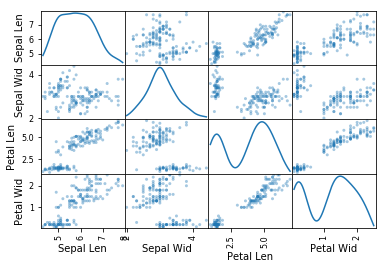

In [7]:
# Scatter matrix plot
pd.plotting.scatter_matrix(X, diagonal='kde', alpha=0.4)

In [8]:
# Classification model comparison between KNN, SVC, LDA, QDA, Random Forest
print('Model Comparison and Selection: Logistic Reg., LDA, QDA, SVC, KNN, RandomForest')

# Prepare Models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVC', svm.SVC(kernel='linear', C=1)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100, max_features=3)))

print(models)

Model Comparison and Selection: Logistic Reg., LDA, QDA, SVC, KNN, RandomForest
[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('QDA', QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)), ('SVC', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
    

In [10]:
# Evaluate each model in a loop
results = []

for name, model in models:
    #print(name, model)
    
    # Defining Kfold parameters
    k_fold = KFold(n_splits=5, shuffle=True, random_state=764)
    cv_results = cross_val_score(model, X, Y, cv=k_fold)
    
    # Append cross validation score to a list
    results.append(cv_results)
    
    # Print model performance 
    print("The performance of {} model".format(name))
    print("Accuracy of the cross_val_score (cv=5): ", cv_results)
    print("The mean score with 95-percent confidence interval: %0.2f (+/- %0.2f)" % (cv_results.mean(), 
                                                                                     cv_results.std() * 2), '\n')

The performance of LDA model
Accuracy of the cross_val_score (cv=5):  [0.96666667 1.         0.96666667 0.96666667 1.        ]
The mean score with 95-percent confidence interval: 0.98 (+/- 0.03) 

The performance of QDA model
Accuracy of the cross_val_score (cv=5):  [0.96666667 1.         0.96666667 0.96666667 0.96666667]
The mean score with 95-percent confidence interval: 0.97 (+/- 0.03) 

The performance of SVC model
Accuracy of the cross_val_score (cv=5):  [0.96666667 1.         0.93333333 0.93333333 1.        ]
The mean score with 95-percent confidence interval: 0.97 (+/- 0.06) 

The performance of KNN model
Accuracy of the cross_val_score (cv=5):  [0.93333333 0.96666667 0.93333333 0.96666667 0.96666667]
The mean score with 95-percent confidence interval: 0.95 (+/- 0.03) 

The performance of RFC model
Accuracy of the cross_val_score (cv=5):  [0.96666667 0.9        0.93333333 0.93333333 1.        ]
The mean score with 95-percent confidence interval: 0.95 (+/- 0.07) 

